# ADS-507-01 Group 3 Final Project
# Wild and Wonderful Sales: A Way to Hike Up your Profit
# Ben Earnest, Vannesa Salazar, Renetta Nelson

In [16]:
#import libraries

import sqlalchemy
import os
import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt
import warnings
from df2gspread import df2gspread as d2g



warnings.filterwarnings('ignore')


You will need to add your own local server password (need to figure out a cleaner solution)

In [3]:
#update connection to use go sales database
connection = mysql.connect(host='localhost',
                         user='root',
                         password='Unicornbear#23',
                         database='gosales')

conn_gdp = mysql.connect(host='localhost',
                         user='root',
                         password='Unicornbear#23',
                         database='gdp_by_countries')

In [14]:
import gspread
#import oauth2client
from oauth2client.service_account import ServiceAccountCredentials



scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name("C:/Users/nelso/AppData/Local/Programs/Python/Python38/Lib/site-packages/gspread/myfile.json",scope )
gc = gspread.authorize(credentials)
spreadsheet_key='1t7lD2-7TqZsjMFUdz7QPYTNtGECHc8QaH01aN591CJw'

We can start queries here to start working the transform part (build the tables we want to use from the database)

In [32]:
num3 = pd.read_sql_query("""SELECT DISTINCT COUNT(Type), Country FROM go_retailers GROUP BY Country""", connection)
num3

,COUNT(Type),Country
0,43,France
1,26,Switzerland
2,38,Germany
3,34,Canada
4,104,United States
5,10,Mexico
6,49,Japan
7,17,Sweden
8,19,Netherlands
9,22,Italy


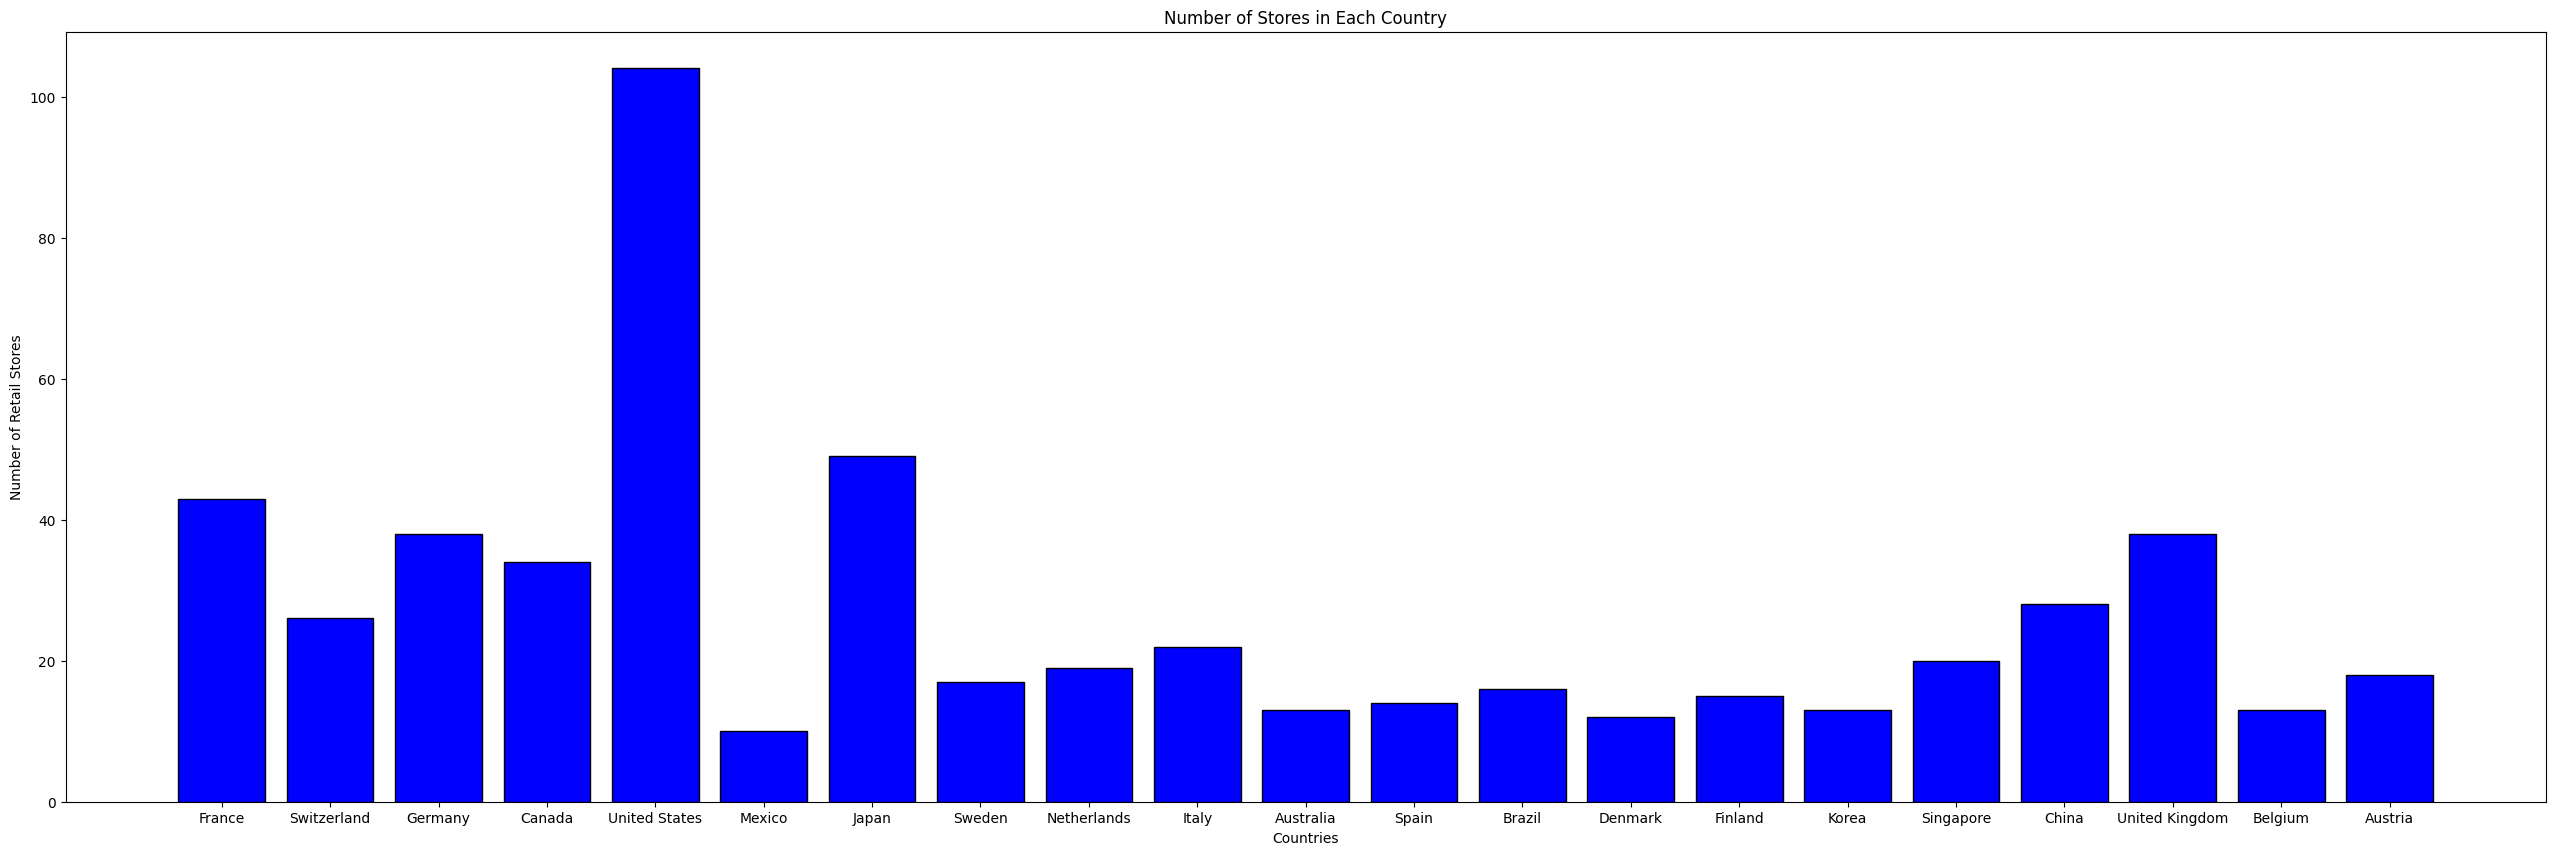

In [118]:
sql_cursor = connection.cursor()


sql_cursor.execute("""SELECT DISTINCT COUNT(Type), Country FROM go_retailers GROUP BY Country""")


cnttype = []
countryname = []

for x in sql_cursor:
    cnttype.append(x[0])
    countryname.append(x[1])




f = plt.figure()
f.set_figwidth(32)
f.set_figheight(10)


plt.bar(countryname, cnttype, color = 'b', edgecolor = 'black')
#plt.ylim(0, 250)
plt.xlabel("Countries")
plt.ylabel("Number of Retail Stores")
plt.title("Number of Stores in Each Country")
plt.show()


In [119]:
num4 = pd.read_sql_query("""SELECT COUNT(Type), Type FROM go_retailers GROUP BY Type""", connection)
num4

,COUNT(Type),Type
0,30,Equipment Rental Store
1,72,Golf Shop
2,45,Direct Marketing
3,46,Warehouse Store
4,164,Outdoors Shop
5,31,Eyewear Store
6,50,Department Store
7,124,Sports Store


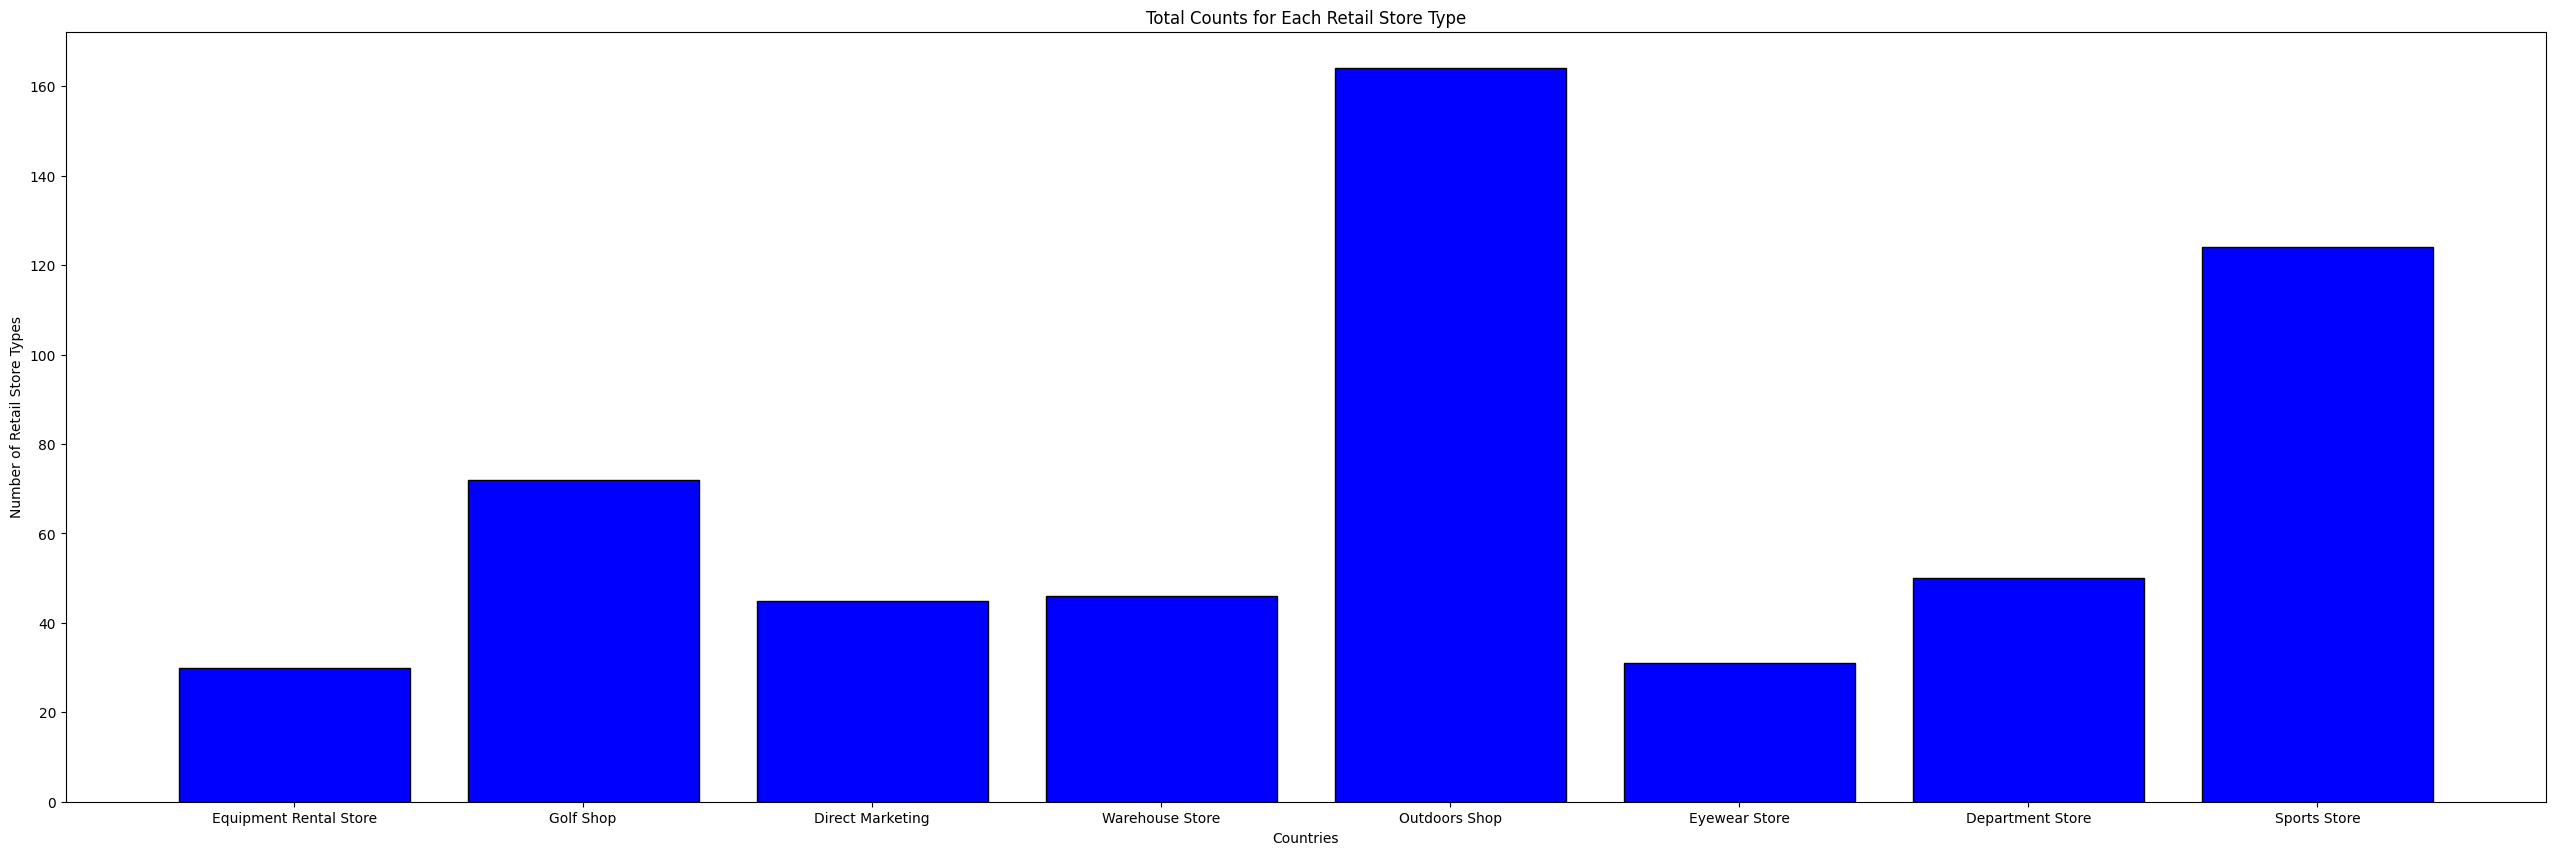

In [34]:
sql_cursor = connection.cursor()


sql_cursor.execute("""SELECT COUNT(Type), Type FROM go_retailers GROUP BY Type""")


cnttype = []
countryname = []

for x in sql_cursor:
    cnttype.append(x[0])
    countryname.append(x[1])




f = plt.figure()
f.set_figwidth(32)
f.set_figheight(10)


plt.bar(countryname, cnttype, color = 'b', edgecolor = 'black')
#plt.ylim(0, 250)
plt.xlabel("Countries")
plt.ylabel("Number of Retail Store Types")
plt.title("Total Counts for Each Retail Store Type")
plt.show()


            Date                     reproduct  Unit_cost  Unit_price
0     2015-01-12                Hibernator Pad      18.83       41.31
1     2015-01-12               EverGlow Butane      40.63       67.73
2     2015-01-12                     Firefly 2      16.38       27.37
3     2015-01-12  Canyon Mule Journey Backpack     213.33      370.86
4     2015-01-12          Mountain Man Digital      20.00       41.61
...          ...                           ...        ...         ...
1649  2016-08-18                     Polar Sun      26.08       61.84
1650  2016-08-18                 Husky Rope 60     126.51      190.00
1651  2016-08-18             Hibernator Pillow       8.37       17.65
1652  2016-08-18           Hibernator Camp Cot      65.41      104.48
1653  2016-08-18               EverGlow Double      28.75       52.15

[1654 rows x 4 columns]
(1654, 4)


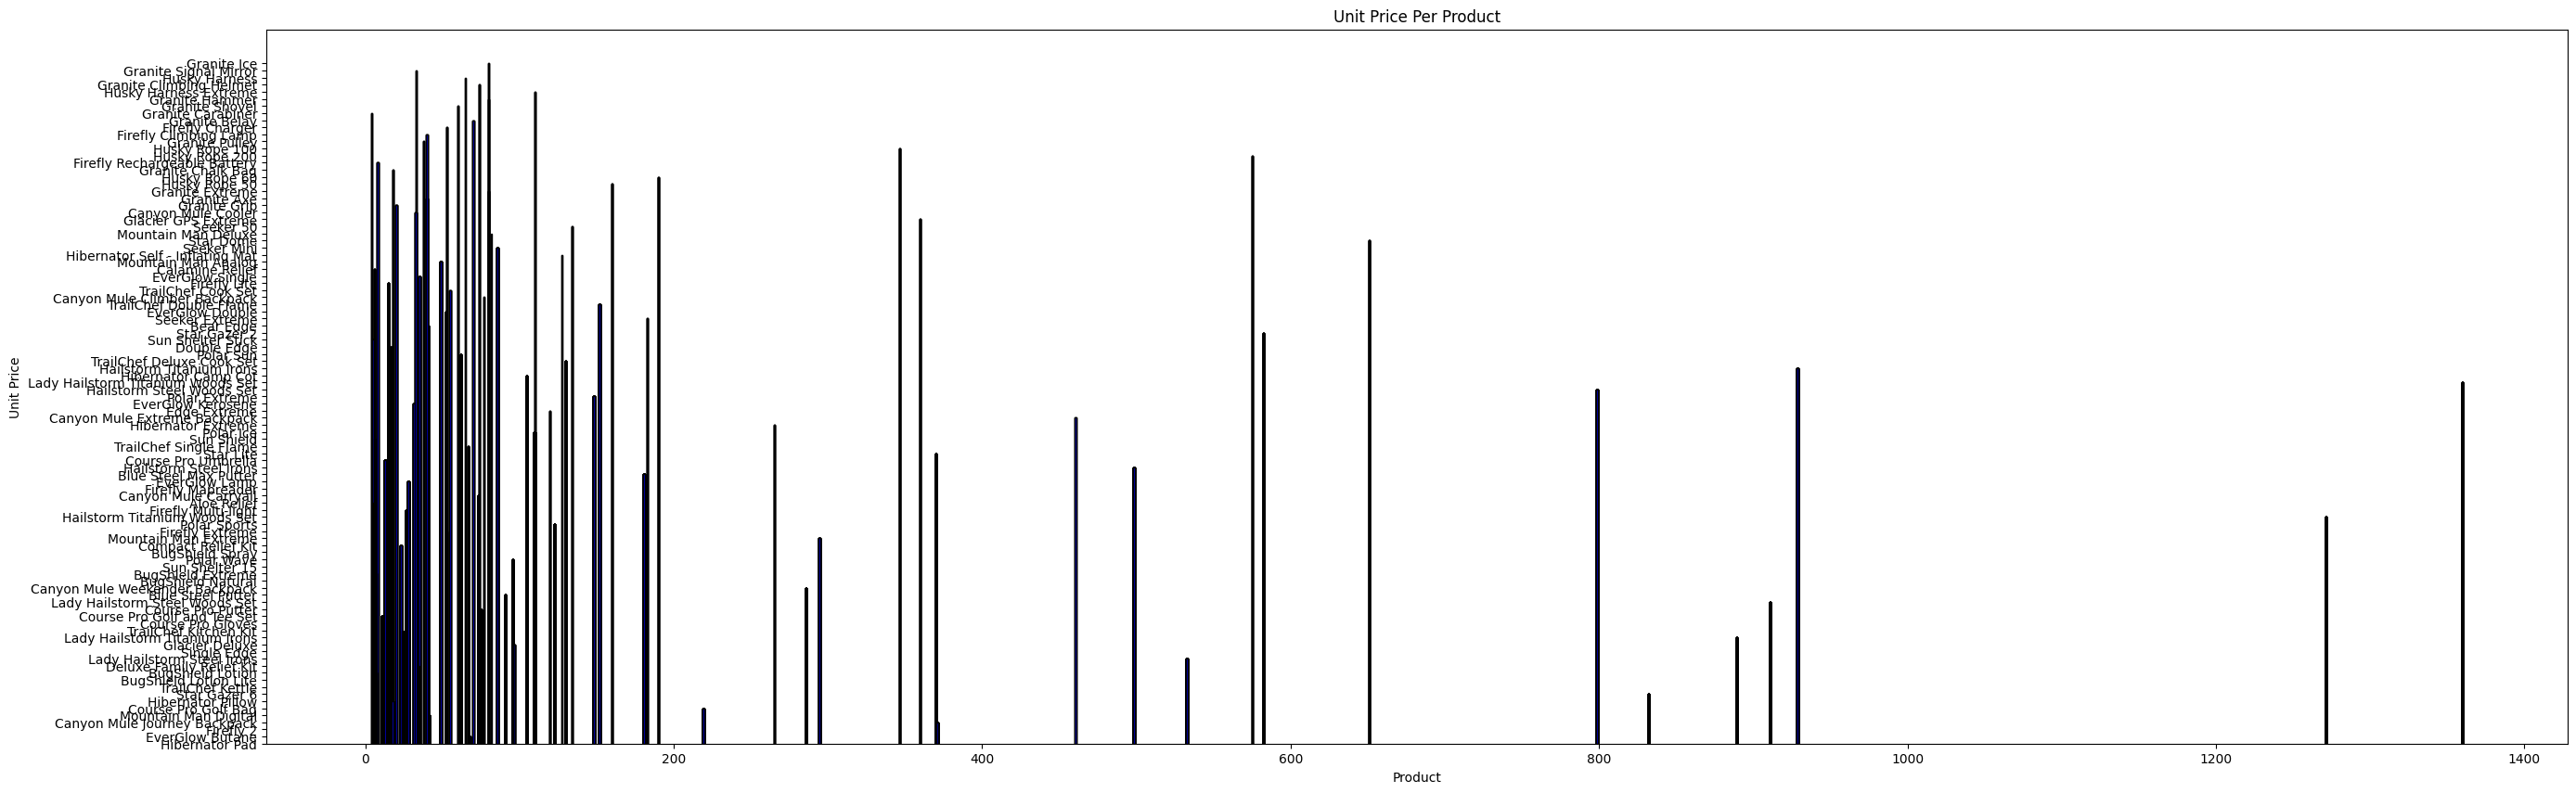

Data upload success


In [36]:
sql_cursor = connection.cursor()

sql_cursor.execute("""SELECT DISTINCT Product, Date, gp.Unit_cost, gp.Unit_price FROM go_products as gp 
                            INNER JOIN go_daily_sales as gds ON gp.Product_number = gds.Product_number 
                            INNER JOIN go_retailers as gr ON gds.retailer_code = gr.retailer_code
                            ORDER BY 2 
                            """)


redate = []
reproduct = []
recost = []
reprice = []

for x in sql_cursor:
    reproduct.append(x[0])
    redate.append(x[1])
    recost.append(x[2])
    reprice.append(x[3])


price_df = pd.DataFrame(redate,columns=["Date"])
price_df["reproduct"] = reproduct
price_df["Unit_cost"] = recost
price_df["Unit_price"] = reprice
print(price_df)
print(price_df.shape)

f = plt.figure()
f.set_figwidth(32)
f.set_figheight(10)


plt.bar(reprice, reproduct, color = 'b', edgecolor = 'black', label='Type')
#plt.bar(repro, requant, color = 'g', edgecolor = 'black', label='Product line')

#plt.bar(countryname, cnttype)
#plt.ylim(0, 250)
plt.xlabel("Product")
plt.ylabel("Unit Price")
plt.title("Unit Price Per Product")
plt.show()



sheet_name= "ADS 507 - SQL Data Pipeline3"
d2g.upload(price_df, spreadsheet_key, sheet_name, credentials=credentials)
print("Data upload success")

                       Product  Quantity        Date
0           Outdoor Protection      2653  2016-07-13
1         Personal Accessories        18  2016-07-13
2     Mountaineering Equipment       472  2016-07-13
3     Mountaineering Equipment       601  2016-07-13
4     Mountaineering Equipment       425  2016-07-13
...                        ...       ...         ...
1995      Personal Accessories        30  2015-02-09
1996      Personal Accessories        45  2015-02-09
1997      Personal Accessories        91  2015-02-09
1998      Personal Accessories        41  2015-01-12
1999      Personal Accessories       103  2015-01-12

[2000 rows x 3 columns]
(2000, 3)


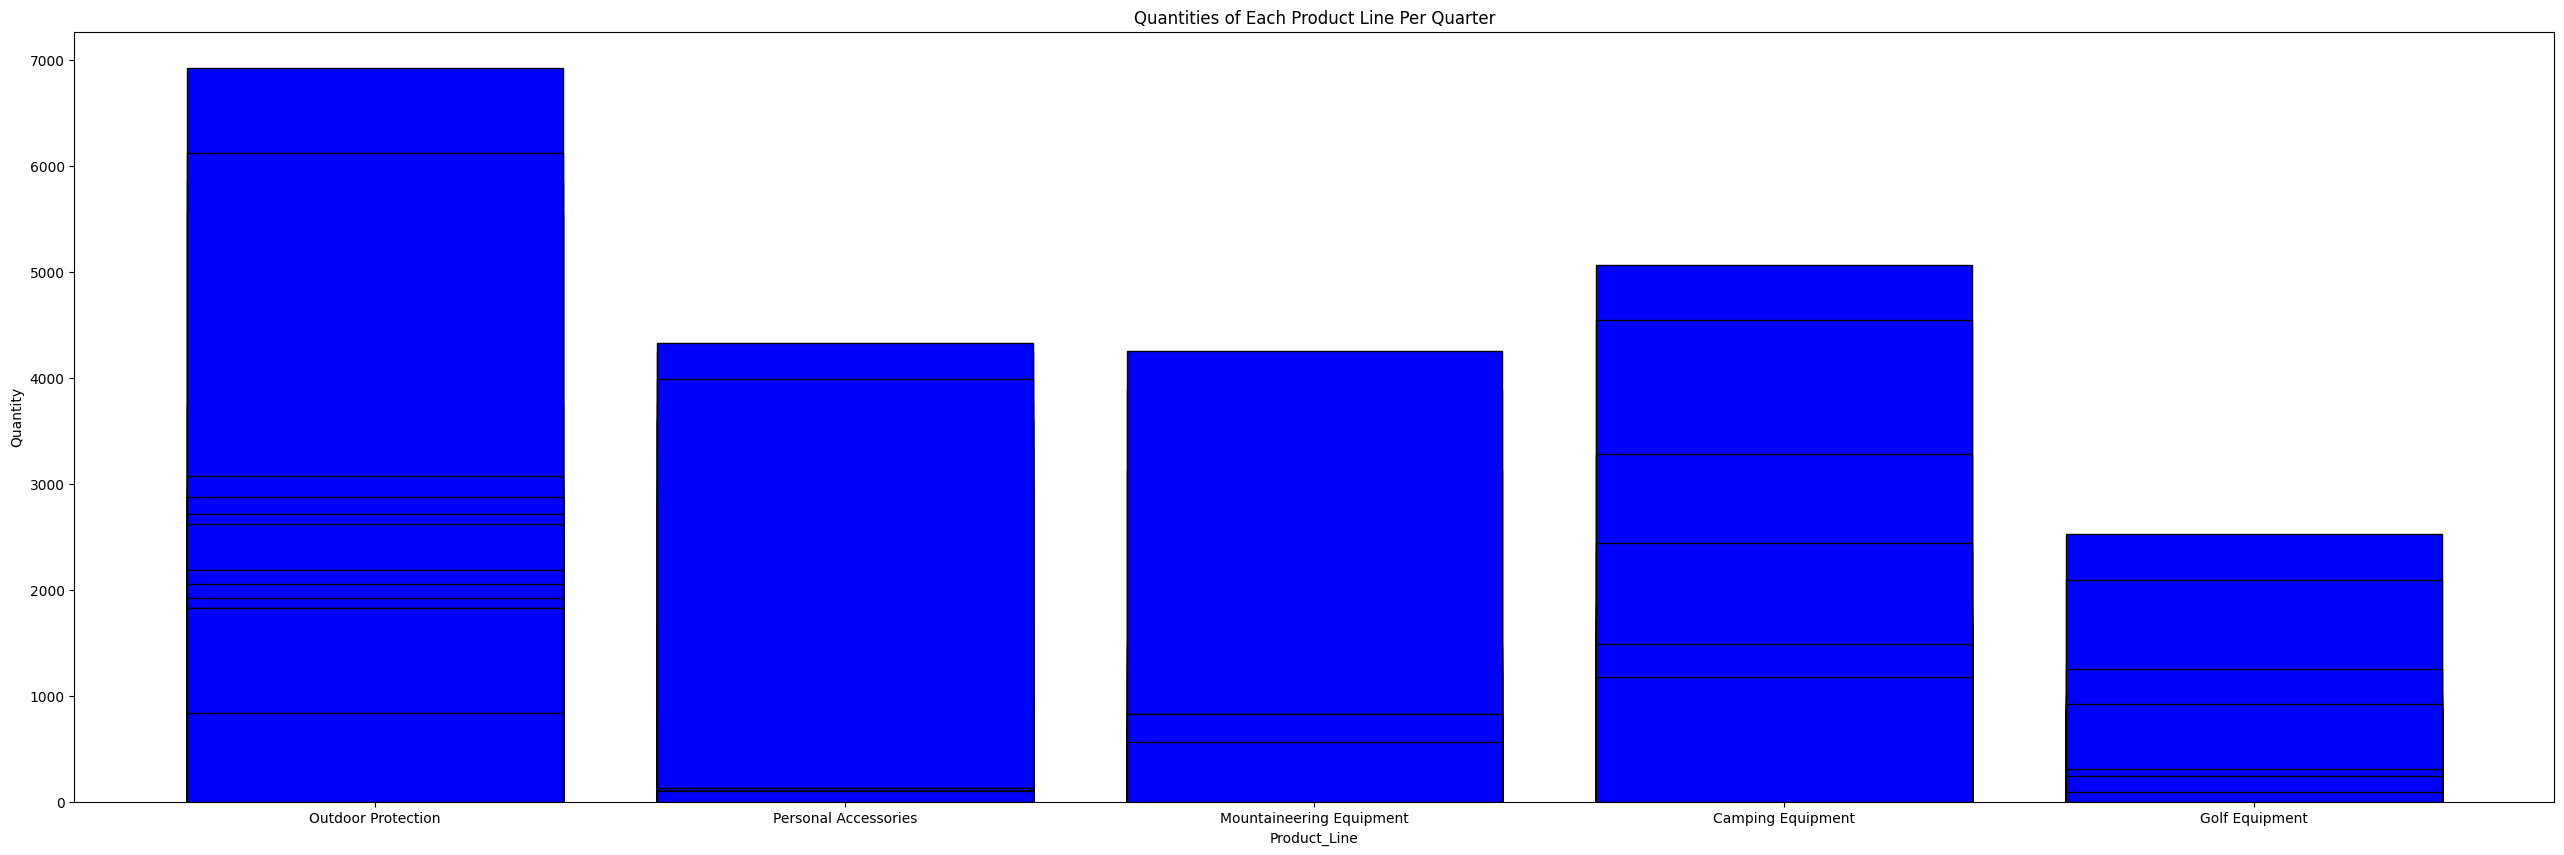

Data upload success


In [23]:
sql_cursor = connection.cursor()

sql_cursor.execute("""SELECT Date, Product_line, Quantity FROM go_products as gp 
                            INNER JOIN go_daily_sales as gds ON gp.Product_number = gds.Product_number 
                            INNER JOIN go_retailers as gr ON gds.retailer_code = gr.retailer_code
                            """)


redate = []
repro = []
requant = []

for x in sql_cursor:
    redate.append(x[0])
    repro.append(x[1])
    requant.append(x[2])


total_product_df = pd.DataFrame(repro,columns=["Product"])
total_product_df["Quantity"] = requant
total_product_df["Date"] = redate
print(total_product_df)
print(total_product_df.shape)

f = plt.figure()
f.set_figwidth(32)
f.set_figheight(10)


plt.bar(repro, requant, color = 'b', edgecolor = 'black', label='Type')
#plt.bar(repro, requant, color = 'g', edgecolor = 'black', label='Product line')

#plt.bar(countryname, cnttype)
#plt.ylim(0, 250)
plt.xlabel("Product_Line")
plt.ylabel("Quantity")
plt.title("Quantities of Each Product Line Per Quarter")
plt.show()



sheet_name= "ADS 507 - SQL Data Pipeline2"
d2g.upload(total_product_df, spreadsheet_key, sheet_name, credentials=credentials)
print("Data upload success")

In [18]:

sql_cursor = conn_gdp.cursor()


sql_cursor.execute("""SELECT Country_Name, gd.2015, gd.2016 FROM gdp as gd WHERE Country_Name IN ('France', 'Switzerland', 
                        'Germany', 'Canada', 'United States', 'Mexico', 'Japan', 'Sweden', 'Netherlands', 'Italy'
                        'Australia', 'Spain', 'Brazil', 'Denmark', 'Finland', 'Korea', 'Singapore', 'China', 
                        'United Kingdom', 'Belgium', 'Austria')""")

name = []
value15 = []
value16 = []

for x in sql_cursor:
    name.append(x[0])
    value15.append(x[1])
    value16.append(x[2])

#print(name, value15, value16)

gdp_df = pd.DataFrame(name, columns = ['Name'])
gdp_df["Yr_2015"] = value15
gdp_df["Yr_2016"] = value16
print(gdp_df)


sheet_name= "ADS 507 - SQL Data Pipeline1"
d2g.upload(gdp_df, spreadsheet_key, sheet_name, credentials=credentials)
print("Data upload success")





              Name       Yr_2015       Yr_2016
0          Austria  3.819710e+11  3.958370e+11
1          Belgium  4.623360e+11  4.760630e+11
2           Brazil  1.802210e+12  1.795700e+12
3           Canada  1.556510e+12  1.527990e+12
4      Switzerland  6.941180e+11  6.878950e+11
5            China  1.106160e+13  1.123330e+13
6          Germany  3.357590e+12  3.469850e+12
7          Denmark  3.026730e+11  3.131160e+11
8            Spain  1.196160e+12  1.233550e+12
9          Finland  2.345340e+11  2.407710e+11
10          France  2.439190e+12  2.472960e+12
11  United Kingdom  2.934860e+12  2.699660e+12
12           Japan  4.444930e+12  5.003680e+12
13          Mexico  1.171870e+12  1.078490e+12
14     Netherlands  7.655730e+11  7.840600e+11
15       Singapore  3.080040e+11  3.188320e+11
16          Sweden  5.051040e+11  5.156550e+11
17   United States  1.820600e+13  1.869510e+13
Data upload success
